In [1]:
# Importera os pga felmeddelanden
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Importera nödvändiga bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Läs in datasetet från en CSV-fil
file_path = "customerdata4.csv"
data = pd.read_csv(file_path)

# Visa de första raderna av data och statistisk sammanfattning
print(data.head())  # Visa första 5 raderna för att förstå strukturen
print(data.describe())  # Beskriv data: min, max, medelvärde, std, etc.

   CustomerID  Gender  Age  Annual Income (10kkr)  Spending Score (1-100)
0           1    Male   19                     15                      39
1           2    Male   21                     15                      81
2           3  Female   20                     16                       6
3           4  Female   23                     16                      77
4           5  Female   31                     17                      40
       CustomerID         Age  Annual Income (10kkr)  Spending Score (1-100)
count  200.000000  200.000000             200.000000              200.000000
mean   100.500000   38.850000              60.560000               50.200000
std     57.879185   13.969007              26.264721               25.823522
min      1.000000   18.000000              15.000000                1.000000
25%     50.750000   28.750000              41.500000               34.750000
50%    100.500000   36.000000              61.500000               50.000000
75%    150.250000

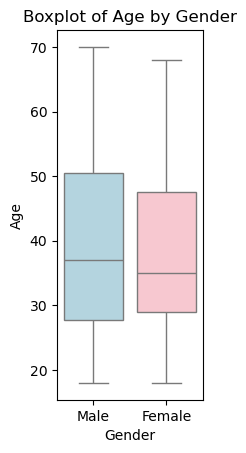

In [3]:
# Boxplot för att analysera åldersfördelningen per kön
plt.subplot(1, 3, 1)
sns.boxplot(x="Gender", y="Age", data=data, hue="Gender", palette={"Male": "lightblue", "Female": "pink"}, dodge=False)
plt.title("Boxplot of Age by Gender")  # Titel för plotten
plt.xlabel("Gender")  # Etikett för x-axeln
plt.ylabel("Age")  # Etikett för y-axeln
plt.legend([], [], frameon=False)  # Dölj legend eftersom färgerna är uppenbara
plt.show()

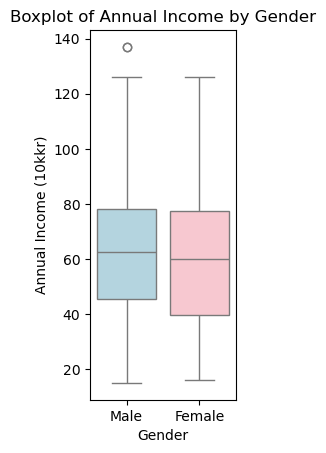

In [5]:
# Boxplot för att analysera årlig inkomst per kön
plt.subplot(1, 3, 2)
sns.boxplot(x="Gender", y="Annual Income (10kkr)", data=data, hue="Gender", palette={"Male": "lightblue", "Female": "pink"}, dodge=False)
plt.title("Boxplot of Annual Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Annual Income (10kkr)")
plt.legend([], [], frameon=False)
plt.show()

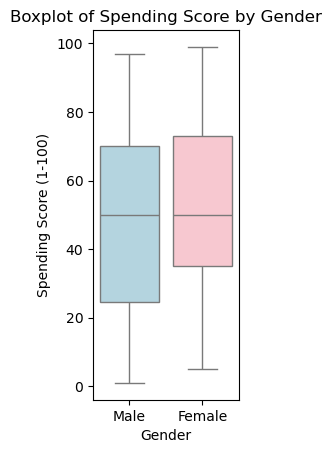

In [7]:
# Boxplot för att analysera utgiftspoäng per kön
plt.subplot(1, 3, 3)
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=data, hue="Gender", palette={"Male": "lightblue", "Female": "pink"}, dodge=False)
plt.title("Boxplot of Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.legend([], [], frameon=False)
plt.show()

In [9]:
# Skapa datapunkter för ålder och utgiftspoäng
point = data[["Age", "Spending Score (1-100)"]].values  # Extrahera endast relevanta kolumner

# Separera x- och y-koordinater för scatter plot
xCoord = point[:, 0]  # Ålder
yCoord = point[:, 1]  # utgiftspoäng

# Visa koordinater för kontroll
print(xCoord)
print(yCoord)

[19 21 20 23 31 22 35 23 64 30 67 35 58 24 37 22 35 20 52 35 35 25 46 31
 54 29 45 35 40 23 60 21 53 18 49 21 42 30 36 20 65 24 48 31 49 24 50 27
 29 31 49 33 31 59 50 47 51 69 27 53 70 19 67 54 63 18 43 68 19 32 70 47
 60 60 59 26 45 40 23 49 57 38 67 46 21 48 55 22 34 50 68 18 48 40 32 24
 47 27 48 20 23 49 67 26 49 21 66 54 68 66 65 19 38 19 18 19 63 49 51 50
 27 38 40 39 23 31 43 40 59 38 47 39 25 31 20 29 44 32 19 35 57 32 28 32
 25 28 48 32 34 34 43 39 44 38 47 27 37 30 34 30 56 29 19 31 50 36 42 33
 36 32 40 28 36 36 52 30 58 27 59 35 37 32 46 29 41 30 54 28 41 36 34 32
 33 38 47 35 45 32 32 30]
[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 35 95 

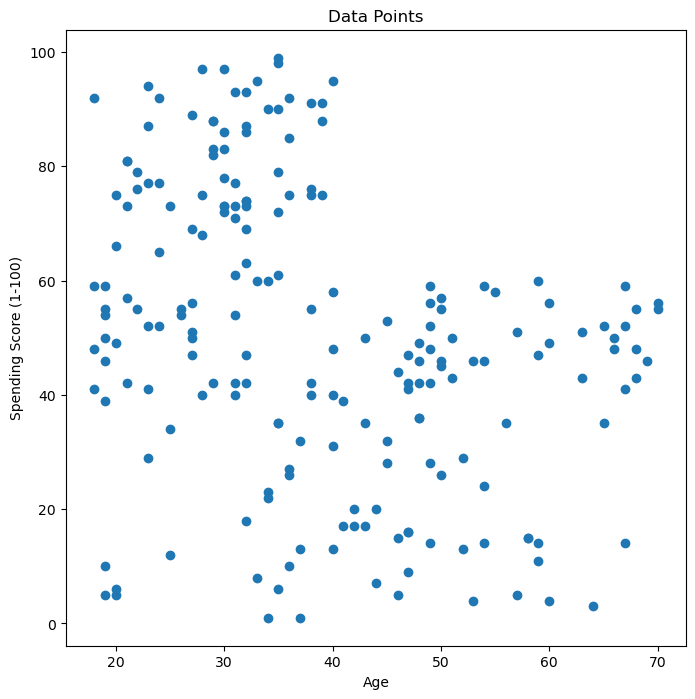

In [11]:
# Skapa scatter plot för datapunkterna
labels = range(1, len(point) + 1)  # Skapa etiketter för varje punkt
plt.figure(figsize=(8, 8))  # Definiera storleken på figuren
plt.scatter(xCoord, yCoord, label='True Position')  # Rita scatter plot
plt.title("Data Points")  # Titel för plotten
plt.xlabel("Age")  # Etikett för x-axeln
plt.ylabel("Spending Score (1-100)")  # Etikett för y-axeln
plt.show()

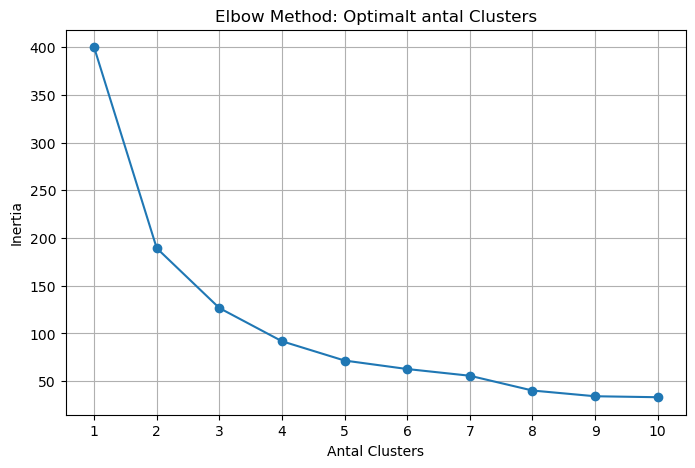

In [13]:
# Elbow-metoden för att hitta optimalt antal kluster
def elbow_method(data, max_clusters=10):
    inertia = []  # Lista för att lagra inertia-värden
    cluster_range = range(1, max_clusters + 1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot för Elbow-metoden
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o')
    plt.title('Elbow Method: Optimalt antal Clusters')
    plt.xlabel('Antal Clusters')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.show()

# Skala data om det behövs och kör Elbow-metoden
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[["Age", "Spending Score (1-100)"]])  # Justerar kolumnerna

elbow_method(scaled_data)

Centroids:
[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


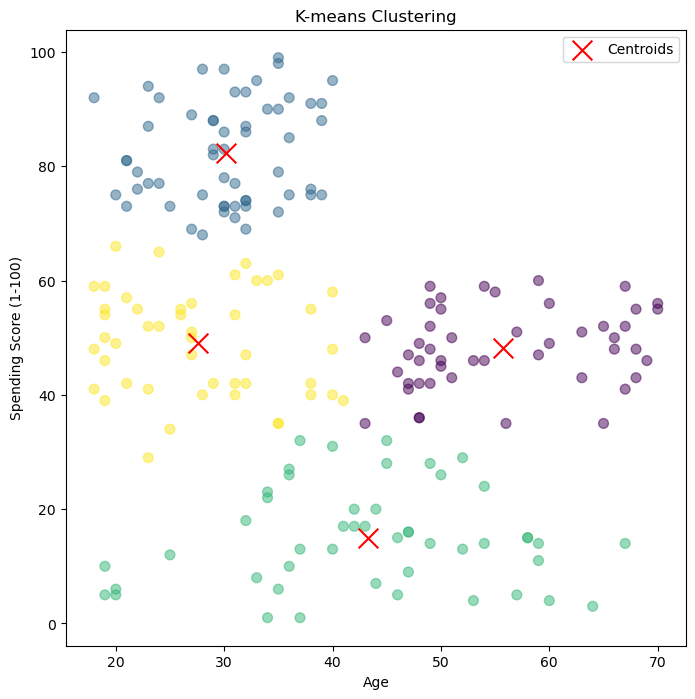

In [15]:
# K-means-klustring för ålder och utgiftspoäng
k = 4  # Antal kluster
kmeans = KMeans(n_clusters=k, random_state=42).fit(point)  # Träna modellen

# Hämta centroid-koordinater och klusteretiketter
centroids = kmeans.cluster_centers_  # Koordinater för klustermedelvärden
labels = kmeans.labels_  # Kluster för varje datapunkt

# Visa centroid-koordinater för kontroll
print("Centroids:")
print(centroids)

# Visualisera k-means-klustringen
plt.figure(figsize=(8, 8))
plt.scatter(point[:, 0], point[:, 1], c=labels.astype(float), s=50, alpha=0.5, cmap="viridis")  # Datapunkter med färg baserat på kluster
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label="Centroids")  # Centroidmarkeringar
plt.title("K-means Clustering")  # Titel
plt.xlabel("Age")  # Etikett för x-axeln
plt.ylabel("Spending Score (1-100)")  # Etikett för y-axeln
plt.legend()  # Visa legend
plt.show()

In [17]:
# K-means-klustring för Årlig inkomst och utgiftspoäng
point = data[["Annual Income (10kkr)", "Spending Score (1-100)"]].values  # Extrahera relevanta kolumner
xCoord = point[:, 0]  # Årlig inkomst
yCoord = point[:, 1]  # utgiftspoäng

# Visa koordinater för kontroll
print(xCoord)
print(yCoord)

[ 15  15  16  16  17  17  18  18  19  19  19  19  20  20  20  20  21  21
  23  23  24  24  25  25  28  28  28  28  29  29  30  30  33  33  33  33
  34  34  37  37  38  38  39  39  39  39  40  40  40  40  42  42  43  43
  43  43  44  44  46  46  46  46  47  47  48  48  48  48  48  48  49  49
  50  50  54  54  54  54  54  54  54  54  54  54  54  54  57  57  58  58
  59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137]
[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 5

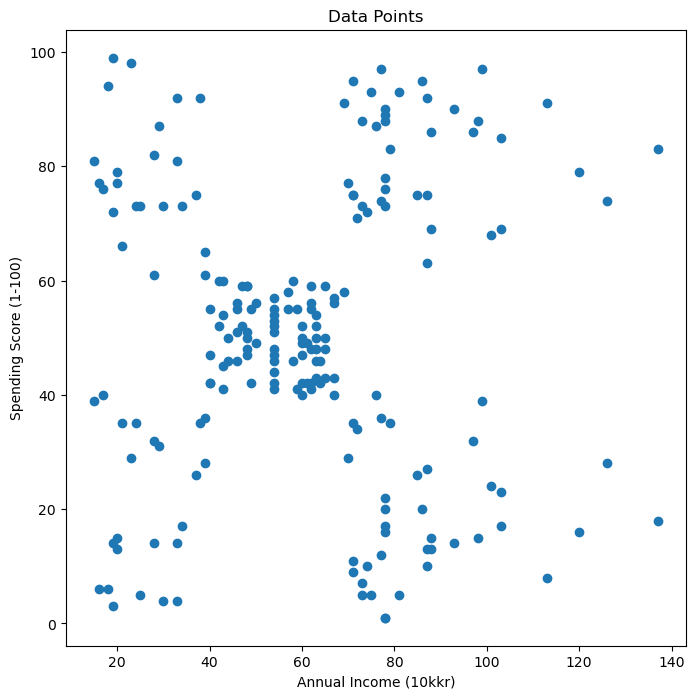

In [19]:
# Skapa scatter plot för datapunkterna
labels = range(1, len(point) + 1)  # Skapa etiketter för varje punkt
plt.figure(figsize=(8, 8))
plt.scatter(xCoord, yCoord, label='True Position')  # Rita scatter plot
plt.title("Data Points")  # Titel
plt.xlabel("Annual Income (10kkr)")  # Etikett för x-axeln
plt.ylabel("Spending Score (1-100)")  # Etikett för y-axeln
plt.show()

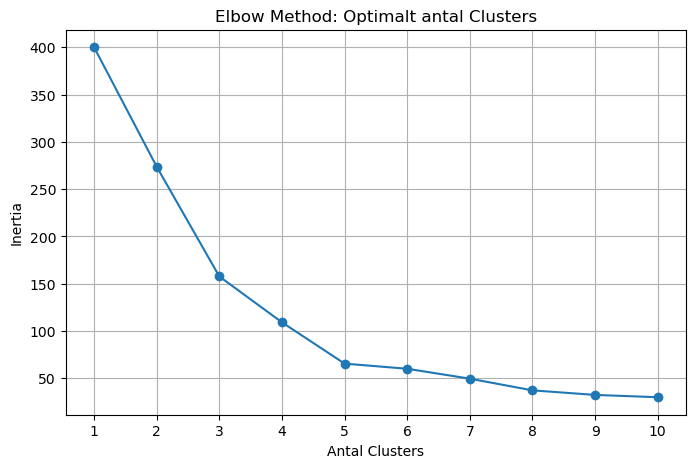

In [21]:
# Elbow-metoden för att hitta optimalt antal kluster
def elbow_method(data, max_clusters=10):
    inertia = []  # Lista för att lagra inertia-värden
    cluster_range = range(1, max_clusters + 1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot för Elbow-metoden
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o')
    plt.title('Elbow Method: Optimalt antal Clusters')
    plt.xlabel('Antal Clusters')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.show()

# Skala data om det behövs och kör Elbow-metoden
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[["Spending Score (1-100)", "Annual Income (10kkr)"]])

elbow_method(scaled_data)

Centroids:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


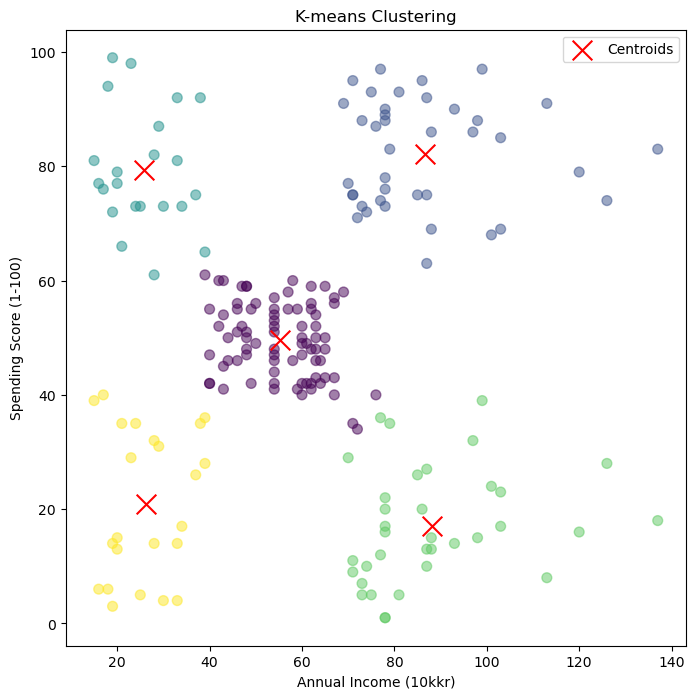

In [23]:
# K-means-klustring för Årlig inkomst och utgiftspoäng
k = 5  # Antal kluster
kmeans = KMeans(n_clusters=k, random_state=42).fit(point)  # Träna modellen

# Hämta centroid-koordinater och klusteretiketter
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visa centroid-koordinater för kontroll
print("Centroids:")
print(centroids)

# Visualisera k-means-klustringen
plt.figure(figsize=(8, 8))
plt.scatter(point[:, 0], point[:, 1], c=labels.astype(float), s=50, alpha=0.5, cmap="viridis")  # Datapunkter med färg baserat på kluster
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label="Centroids")  # Centroidmarkeringar
plt.title("K-means Clustering")  # Titel
plt.xlabel("Annual Income (10kkr)")  # Etikett för x-axeln
plt.ylabel("Spending Score (1-100)")  # Etikett för y-axeln
plt.legend()  # Visa legend
plt.show()